### Notebook for testing gridsearch for cluster PC

In [43]:
%load_ext autoreload
%autoreload 2
from clustercausal.experiments.ExperimentRunner import ExperimentRunner
import itertools
import yaml
import os
import pickle
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
config_path = 'clustercausal/experiments/configs/debug_config.yaml'
experiment = ExperimentRunner(config_path)

Number of experiments: 1


In [45]:
experiment.run_gridsearch_experiment()

2023-08-18 15:22:35,023 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec


Look at the configuration of the experiment

In [9]:
with open ('clustercausal/experiments/configs/cluster_pc_2.yaml', 'r') as file:
    config = yaml.safe_load(file)
num_experiments = 0
for key in config.keys():
    num_experiments += len(config[key])
# print(f'Number of experiments: {num_experiments}')
config['lin_distribution_type']

['gauss', 'exp', 'gumbel']

In [10]:
# Define the base directory
base_directory = os.path.normpath('clustercausal/experiments/results')

# List all subdirectories in the base directory (i.e., all the 'gridsearch' directories)
dirs_gridsearch = [d for d in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, d))]

# If there's at least one 'gridsearch' directory
if dirs_gridsearch:
    first_gridsearch_directory = os.path.normpath(os.path.join(base_directory, dirs_gridsearch[0]))

    # List all subdirectories inside the first 'gridsearch' directory (i.e., all the 'experiment' directories)
    dirs_experiment = [d for d in os.listdir(first_gridsearch_directory) if os.path.isdir(os.path.join(first_gridsearch_directory, d))]

    # If there's at least one 'experiment' directory inside the first 'gridsearch' directory
    if dirs_experiment:
        first_experiment_directory = os.path.normpath(os.path.join(first_gridsearch_directory, dirs_experiment[0]))
        print(f"Directory of the first 'experiment' inside the first 'gridsearch': {first_experiment_directory}")
    else:
        print(f"No 'experiment' directories found inside {first_gridsearch_directory}.")
else:
    print("No 'gridsearch' directories found in the base directory.")

Directory of the first 'experiment' inside the first 'gridsearch': clustercausal\experiments\results\ClusterPC_2023-08-16 14-23-07.067298\erdos_renyi_10_nodes_14_edges_3_clusters_exp


In [11]:
# Path to the results.yaml file in the first directory
results_file_path = os.path.normpath(os.path.join(first_experiment_directory, 'results.yaml'))

# Check if results.yaml exists
if os.path.exists(results_file_path):
    # Open the results.yaml file with YAML
    with open(results_file_path, 'r') as file:
        result_dict = yaml.load(file, Loader = yaml.FullLoader)
    print(result_dict)
else:
    print(f"'results.yaml' not found in {first_experiment_directory}.")

{'base_evaluation_results': {'adj_false_negative': 4, 'adj_false_positive': 1, 'adj_precision': 0.8888888888888888, 'adj_recall': 0.6666666666666666, 'adj_true_negative': 32, 'adj_true_positive': 8, 'arrow_false_negative': 7.0, 'arrow_false_negative_ce': 3.0, 'arrow_false_positive': 3.0, 'arrow_false_positive_ce': 2.0, 'arrow_precision': 0.625, 'arrow_precision_ce': 0.7142857142857143, 'arrow_recall': 0.4166666666666667, 'arrow_recall_ce': 0.625, 'arrow_true_negative': 85.0, 'arrow_true_negative_ce': 90.0, 'arrow_true_positive': 5.0, 'arrow_true_positive_ce': 5.0, 'base_shd': 7}, 'cluster_evaluation_results': {'adj_false_negative': 4, 'adj_false_positive': 1, 'adj_precision': 0.8888888888888888, 'adj_recall': 0.6666666666666666, 'adj_true_negative': 32, 'adj_true_positive': 8, 'arrow_false_negative': 5.0, 'arrow_false_negative_ce': 1.0, 'arrow_false_positive': 1.0, 'arrow_false_positive_ce': 0.0, 'arrow_precision': 0.875, 'arrow_precision_ce': 1.0, 'arrow_recall': 0.5833333333333334, '

You can reload the CausalGraph objects and draw the graphs:

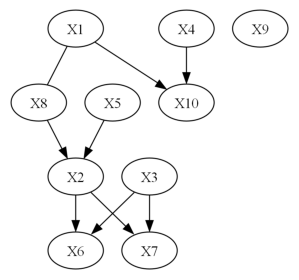

In [12]:
# Path to the cluster_est_graph.pkl file in the directory
pkl_file_path = os.path.normpath(os.path.join(first_experiment_directory, 'cluster_est_graph.pkl'))

# Check if cluster_est_graph.pkl exists
if os.path.exists(pkl_file_path):
    # Load the cluster_est_graph.pkl file
    with open(pkl_file_path, 'rb') as file:
        cluster_est_graph = pickle.load(file)
    print(cluster_est_graph)
else:
    print(f"'cluster_est_graph.pkl' not found in {first_experiment_directory}.")
cluster_est_graph.draw_pydot_graph()

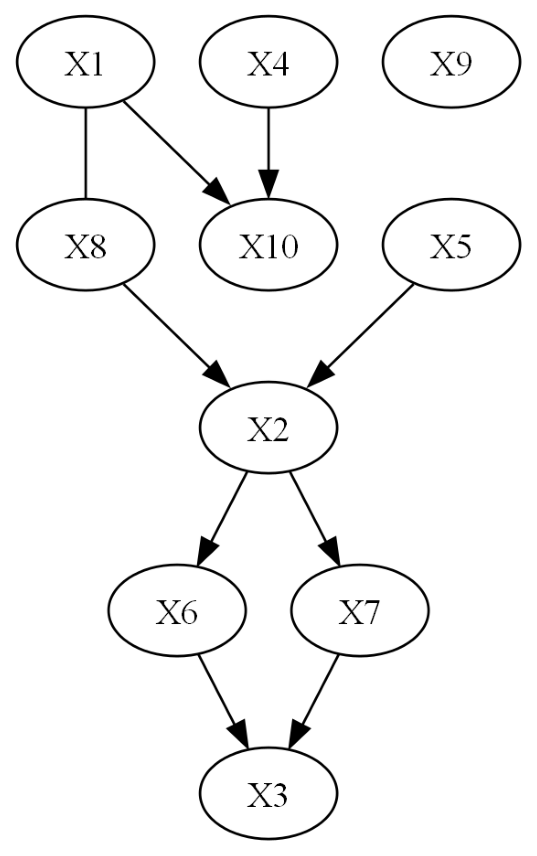

In [13]:
# Path to the base_est_graph.pkl file in the directory
pkl_file_path = os.path.normpath(os.path.join(first_experiment_directory, 'base_est_graph.pkl'))

# Check if base_est_graph.pkl exists
if os.path.exists(pkl_file_path):
    # Load the base_est_graph.pkl file
    with open(pkl_file_path, 'rb') as file:
        base_est_graph = pickle.load(file)
    print(base_est_graph)
else:
    print(f"'base_est_graph.pkl' not found in {first_experiment_directory}.")
base_est_graph.draw_pydot_graph()

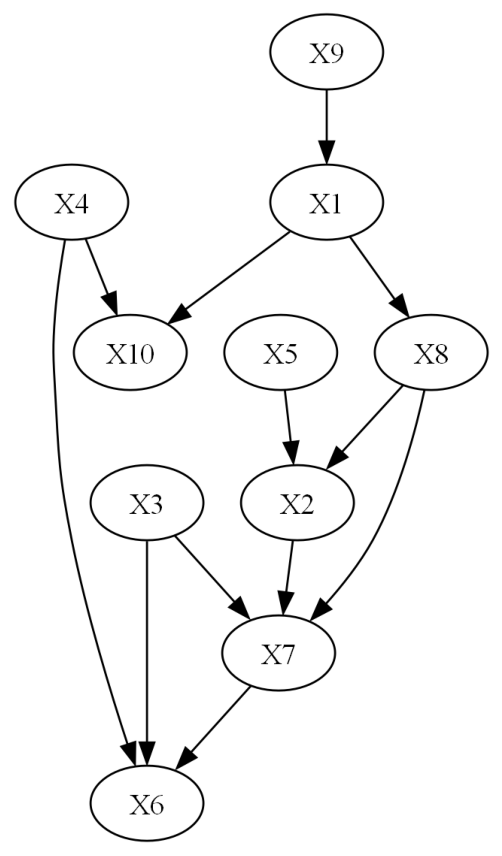

In [14]:
# Path to the cluster_dag.pkl file in the directory
pkl_file_path = os.path.normpath(os.path.join(first_experiment_directory, 'cluster_dag.pkl'))

# Check if cluster_dag.pkl exists
if os.path.exists(pkl_file_path):
    # Load the cluster_dag.pkl file
    with open(pkl_file_path, 'rb') as file:
        cluster_dag = pickle.load(file)
    print(cluster_dag)
else:
    print(f"'cluster_dag.pkl' not found in {first_experiment_directory}.")

cluster_dag.true_dag.draw_pydot_graph()

### Load all results and visualize

In [33]:
gridssearch_directory =  'clustercausal\experiments\_results\ClusterPC_2023-08-18 13-56-24.897004' #first_gridsearch_directory
gridssearch_directory = gridssearch_directory.replace('\\', '/')
print(f"Gridsearch directory: {gridssearch_directory}")

Gridsearch directory: clustercausal/experiments/_results/ClusterPC_2023-08-18 13-56-24.897004


In [34]:
from clustercausal.utils.Utils import *
pd.set_option('display.max_columns', None)
data = load_data(gridssearch_directory)

In [35]:
data.shape

(1, 60)

In [36]:
data.head()

,base_adj_f1_score,base_adj_false_negative,base_adj_false_positive,base_adj_precision,base_adj_recall,base_adj_true_negative,base_adj_true_positive,base_arrow_f1_score,base_arrow_f1_score_ce,base_arrow_false_negative,base_arrow_false_negative_ce,base_arrow_false_positive,base_arrow_false_positive_ce,base_arrow_precision,base_arrow_precision_ce,base_arrow_recall,base_arrow_recall_ce,base_arrow_true_negative,base_arrow_true_negative_ce,base_arrow_true_positive,base_arrow_true_positive_ce,base_base_shd,base_sid_lower,base_sid_upper,cluster_adj_f1_score,cluster_adj_false_negative,cluster_adj_false_positive,cluster_adj_precision,cluster_adj_recall,cluster_adj_true_negative,cluster_adj_true_positive,cluster_arrow_f1_score,cluster_arrow_f1_score_ce,cluster_arrow_false_negative,cluster_arrow_false_negative_ce,cluster_arrow_false_positive,cluster_arrow_false_positive_ce,cluster_arrow_precision,cluster_arrow_precision_ce,cluster_arrow_recall,cluster_arrow_recall_ce,cluster_arrow_true_negative,cluster_arrow_true_negative_ce,cluster_arrow_true_positive,cluster_arrow_true_positive_ce,cluster_cluster_shd,cluster_sid_lower,cluster_sid_upper,dag_method,distribution_type,n_clusters,n_edges,n_nodes,noise_scale,sample_size,scm_method,seed,true_sid_lower,true_sid_upper,weight_range
0,0.8,5,0,1.0,0.666667,30,10,0.347826,0.444444,11.0,6.0,4.0,4.0,0.5,0.5,0.266667,0.4,81.0,86.0,4.0,4.0,9,41,50,0.846154,4,0,1.0,0.733333,30,11,0.8,0.952381,5.0,1.0,0.0,0.0,1.0,1.0,0.666667,0.909091,85.0,89.0,10.0,10.0,4,13,31,erdos_renyi,gauss,5,21,10,1,100,linear,None,0,18,"(-1, 2)"


In [19]:
selected_metrics = ['base_adj_precision', 'cluster_adj_precision', 'base_adj_recall', 'cluster_adj_recall', 'base_adj_f1_score', 'cluster_adj_f1_score', 'base_base_shd', 'cluster_cluster_shd']
pd.DataFrame(data[selected_metrics].mean())

,0
base_adj_precision,0.865301
cluster_adj_precision,0.792211
base_adj_recall,0.464053
cluster_adj_recall,0.598265
base_adj_f1_score,0.567359
cluster_adj_f1_score,0.643840
base_base_shd,66.762346
cluster_cluster_shd,57.851852


In [20]:
cluster_dag.true_dag.G.graph

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  1., -1.],
       [ 0.,  0.,  0.,  0.,  1.,  0., -1.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
       [ 0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  0., -1.,  0.,  1.,  0.,  0.],
       [ 1., -1.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])

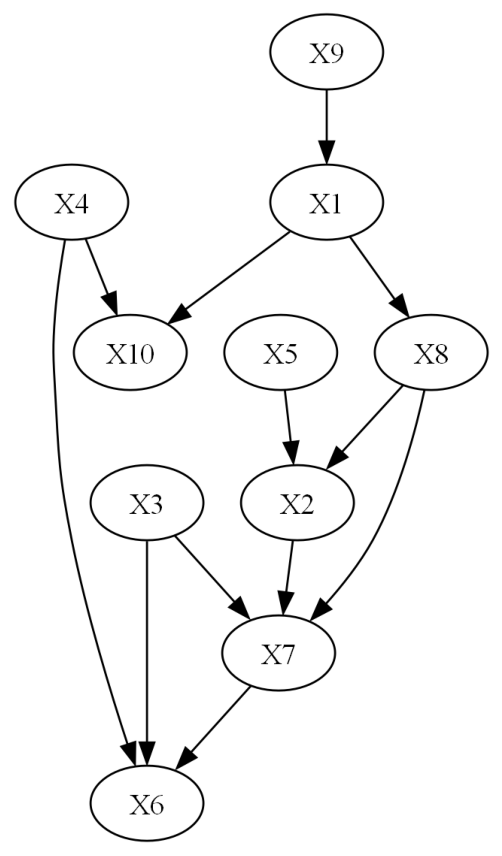

In [21]:
cluster_dag.true_dag.draw_pydot_graph()